<a href="https://colab.research.google.com/github/desaraju02/ai_ml_dl/blob/main/02_nn_regression_with_tf_larger_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

### Read insurance data set


In [4]:
df = pd.read_csv('insurance.csv')
df.shape
df.head()

#Can use the below as well.
#df_insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
#df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
### One hot encode the data frame

In [7]:
df_one_hot = pd.get_dummies(df)

In [8]:
df_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [9]:
X = df_one_hot.drop('charges', axis=1)
y = df_one_hot['charges']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,True,False,True,False,False,True,False,False
1285,47,24.320,0,True,False,True,False,True,False,False,False
1142,52,24.860,0,True,False,True,False,False,False,True,False
969,39,34.320,5,True,False,True,False,False,False,True,False
486,54,21.470,3,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,True,False,True,False,True,False,False,False
1130,39,23.870,5,True,False,True,False,False,False,True,False
1294,58,25.175,0,False,True,True,False,True,False,False,False
860,37,47.600,2,True,False,False,True,False,False,False,True


### Build a neural network

In [13]:
tf.random.set_seed(42)

In [14]:
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10060.6855 - mae: 10060.6855
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7736.2495 - mae: 7736.2495
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7548.4443 - mae: 7548.4443
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7402.0693 - mae: 7402.0693
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7372.4517 - mae: 7372.4517
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7250.1538 - mae: 7250.1538 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7522.2358 - mae: 7522.2358
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7585.7139 - mae: 7585.7139
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7572.8965 - mae: 7572.8965
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7649.9824 - mae: 7649.9824
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7777.3237 - mae: 7777.3237
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

In [15]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6345.2656 - mae: 6345.2656  


[6210.9560546875, 6210.9560546875]

In [16]:
y_preds = insurance_model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [20]:
from sklearn.metrics import r2_score

In [21]:
r2_score(y_test, y_preds.flatten())

0.21288655504975407

### Improve the model

In [39]:
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13272.6533 - mae: 13272.6533
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13123.6406 - mae: 13123.6406
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12820.6680 - mae: 12820.6680
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12212.8906 - mae: 12212.8906
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11153.6709 - mae: 11153.6709
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9718.4434 - mae: 9718.4434
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8298.1855 - mae: 8298.1855
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7514.6924 - mae: 7514.6924
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7385.7715 - mae: 7385.7715
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7358.4292 - mae: 7358.4292
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7336.8501 - mae: 7336.8501
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [44]:
def evaluate_model(model, X_test, y_test):
    y_preds = model.predict(X_test)
    mse = mean_squared_error(y_test, y_preds.flatten())
    r2 = r2_score(y_test, y_preds)
    return r2

In [45]:
evaluate_model(insurance_model_2, X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


0.4006928770286743

In [ ]:
### Improving the model

In [50]:
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 13182.1289 - mae: 13182.1289
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11753.4033 - mae: 11753.4033
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7812.3140 - mae: 7812.3140
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7337.8896 - mae: 7337.8896
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7266.0522 - mae: 7266.0522
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7195.2080 - mae: 7195.2080
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7122.5771 - mae: 7122.5771
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7043.9868 - mae: 7043.9868
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6961.0034 - mae: 6961.0034
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6869.4985 - mae: 6869.4985
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6769.7769 - mae: 6769.7769
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/s

In [47]:
evaluate_model(insurance_model_3, X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


0.724351653840613

Text(0.5, 0, 'epochs')

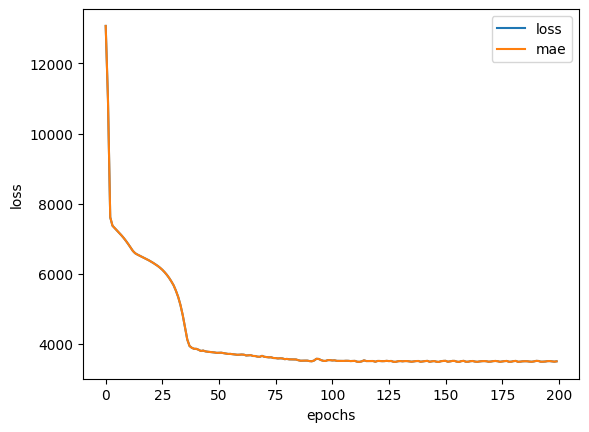

In [51]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

### Early stopping callback

In [52]:
# prompt: early stopping callback

import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

history = insurance_model_3.fit(X_train, y_train, epochs=200, callbacks=[early_stopping])


Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3602.1870 - mae: 3602.1870
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3608.6689 - mae: 3608.6689
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3591.0884 - mae: 3591.0884
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3588.9551 - mae: 3588.9551
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3583.8286 - mae: 3583.8286
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3608.1233 - mae: 3608.1233
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3594.7825 - mae: 3594.7825
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3589.4619 - mae: 3589.4619
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3588.4114 - mae: 3588.4114


In [53]:
evaluate_model(insurance_model_3, X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


0.7250758241242998

### Normalization and Standardization

In [55]:
df_insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [56]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [57]:
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # turn all these column values between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

X = df_insurance.drop('charges', axis=1)
y = df_insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [60]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

### Build a neural network model to fit our normalized data set

In [61]:
tf.random.set_seed(42)

In [62]:
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

history = insurance_model_4.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13296.1865 - mae: 13296.1865
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13287.7842 - mae: 13287.7842
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13267.6152 - mae: 13267.6152
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13225.1221 - mae: 13225.1221
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13149.3994 - mae: 13149.3994
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13030.0352 - mae: 13030.0352
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12856.5186 - mae: 12856.5186
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12618.6113 - mae: 12618.6113
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12306.5361 - mae: 12306.5361
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11913.9746 - mae: 11913.9746
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11448.2754 - mae: 11448.2754
Epoch 12/200
34/34 ━━━━━━━━━━━

In [63]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3213.5317 - mae: 3213.5317  


[3160.951904296875, 3160.951904296875]

In [64]:
evaluate_model(insurance_model_4, X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


0.7212703768953208